<font color='green' size = 5>Homework #3 - ECEN 4005 - Sanjay Kumar Keshava</font>



In [1]:
# import packages and modules
import numpy as np
import qutip as qt
from qutip.qip.operations import x_gate, y_gate, z_gate, s_gate, t_gate, snot, rx, ry, rz, swap ,iswap, swapalpha,cnot, cz_gate, globalphase
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math

In [2]:
# define qubit states
psi0 = qt.basis(2,0)
psi1 = qt.basis(2,1)
plus = (psi0 + psi1).unit()
minus = (psi0 - psi1).unit()

psi00 = qt.basis(4,0)
psi01 = qt.basis(4,1)
psi10 = qt.basis(4,2)
psi11 = qt.basis(4,3)

# define operators 
sx = qt.sigmax()
sy = qt.sigmay()
sz = qt.sigmaz()
si = qt.qeye(2)
sm = qt.Qobj([[0,1],[0,0]])

# define quantities to evaluate
M0 = psi0*psi0.dag() # |0><0| measurement operator
M1 = psi1*psi1.dag() # |1><1| measurement operator
M_plus = plus*plus.dag() # |+><+| measurement operator
M_minus = minus*minus.dag() # |-><-| measurement operator


<font color='green' size = 5>Problem 3</font>

In [3]:
# start the evolution in the |0> state
initial_state = psi0 

# T1
T1 = 5*(10**(-6)) 

# Tphi
Tphi = 1*(10**(-6)) 

# define c_ops so the full Lindblad master equation can be solved
c_ops  = [np.sqrt(1/T1)*sm , np.sqrt(1/(2*Tphi))*sz];
      
# define time axis going up to 100 ns which is the gate time
t_list = np.arange(0, 100*10**(-9), (10**(-10)))

# define function to find fidelity and mesolve result for the time axis given the drive amplitude
def find_fidelity(bigomega):
    
    # define Hamiltonian
    def H_Rabi(t):
        H_op =  0.5*bigomega*sx
        return [H_op, np.ones(len(t))] 
    
    # call mesolve and complete the solution
    result = qt.mesolve(H_Rabi(t_list), initial_state, t_list,c_ops = c_ops)
    
    # state after gate is applied (last element for vector)
    final_state = result.states[-1];
    
    # expected result
    final_expected_state = rx(np.pi)*initial_state
    
    # calculate state fidelity
    fidelity = qt.fidelity(final_state,final_expected_state)

    return (result, fidelity)

# search for optimal drive in some range
def optimize_drive(start,stop,numsteps):
    
    fidold = 0;
    bigomegaold = 0;
    res = [];
    for bigomega in np.linspace(start, stop, numsteps):
        [result, fidelity] = find_fidelity(bigomega)
        if (fidelity>fidold):
            fidold = fidelity
            bigomegaold = bigomega
            res = result
        
    optimaldrive = bigomegaold/((2*(np.pi))*(10**(6)))
    bestfidelity = fidold
    return [res,optimaldrive,bestfidelity]

<font color='green' size = 5>Problems 3(a) and 3(c) Rabi Amplitude Drive and State Fidelity</font>

In [4]:
start = (2*np.pi)*(1*(10**6))
stop = (2*np.pi)*(10*(10**6))
numsteps = 1000
[result,optimaldrive,bestfidelity] = optimize_drive(start,stop,numsteps);
print('')
print('The best result is obtained when the Rabi drive amplitude Ω/2π is: ' + str(optimaldrive) + ' MHz')
print('')
print('This drive provides a fidelity of: ' + str(bestfidelity*100) + '%')
print('')
print('The plot below shows how the state evolves during the gate time:')
print('')


The best result is obtained when the Rabi drive amplitude Ω/2π is: 5.036036036036037 MHz

This drive provides a fidelity of: 98.40982994683895%

The plot below shows how the state evolves during the gate time:



<IPython.core.display.Javascript object>


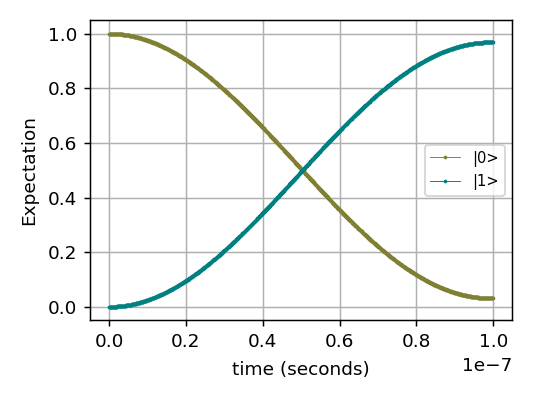

In [5]:
p0 = [qt.expect(M0, result.states[idx]) for idx in range(len(result.states))]
p1 = [qt.expect(M1, result.states[idx]) for idx in range(len(result.states))]
fig, axs = plt.subplots(figsize=(4, 3))

axs.plot(t_list, p0, '-o', markersize= 1, linewidth=0.5,
            color=[0.5,0.5,0.2], label = r'|0>')

axs.plot(t_list, p1, '-o', markersize= 1, linewidth=0.5,
            color=[0.0,0.5,0.5], label = r'|1>')

axs.set_xlabel(r"time (seconds)", labelpad=5)
axs.set_ylabel("Expectation", labelpad=5)
axs.legend(loc='best', fontsize = 8)
axs.grid()

plt.tight_layout()
plt.show()

<font color='green' size = 5>Problems 3(b) Bloch Sphere Path During Gate Time </font>


The diagram below shows the trajectory on/in the Bloch sphere:



<IPython.core.display.Javascript object>


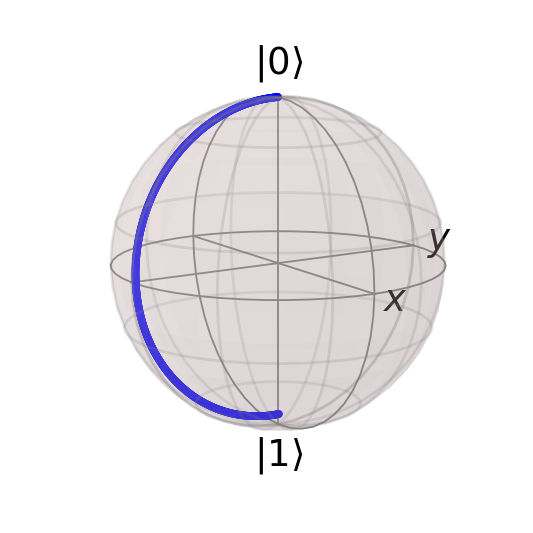

In [7]:
# Extract position on the Bloch sphere
r_x=[]
r_y=[]
r_z=[]

print('')
print('The diagram below shows the trajectory on/in the Bloch sphere:')
print('')

for n in range(len(t_list)):
        
    state = result.states[n]
    # extract points on the Bloch sphere
    r_x.append(qt.expect(sx, state))
    r_y.append(qt.expect(sy, state))
    r_z.append(qt.expect(sz, state))

point_position = [r_x, r_y, r_z]
fig, axs = plt.subplots(figsize=(4, 4), subplot_kw=dict(projection='3d'))
bloch_sphere = qt.Bloch(fig=fig, axes=axs) # create bloch_sphere object
# set the properties of the Bloch sphere
bloch_sphere.point_marker = ['o']
bloch_sphere.point_size   = [10]
bloch_sphere.view         = [40,35]
bloch_sphere.add_points(point_position)
bloch_sphere.render()
plt.show()